In [4]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Définir les transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # redimensionner toutes les images
    transforms.ToTensor(),          # transformer en tenseur PyTorch
    transforms.Normalize((0.5,), (0.5,))  # normaliser
])


In [5]:
# Charger le dataset
train_dataset = datasets.ImageFolder(root="../data", transform=transform)

# Créer le DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)


torch.Size([16, 3, 128, 128])
tensor([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0])


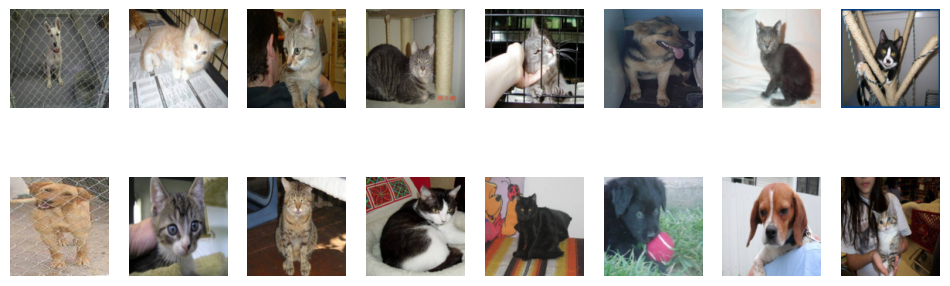

In [6]:
import matplotlib.pyplot as plt

images, labels = next(iter(train_loader))

print(images.shape)  # Exemple : torch.Size([16, 3, 128, 128])
print(labels)        # Labels correspondants

# Afficher les images
fig, axes = plt.subplots(2, 8, figsize=(12, 4))
for i in range(16):
    img = images[i].permute(1, 2, 0)  # réorganiser les dimensions
    axes[i//8, i%8].imshow((img + 1) / 2)  # remettre les valeurs entre 0 et 1
    axes[i//8, i%8].axis("off")
plt.show()


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        # Convolution 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        # Convolution 2
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        # Convolution 3
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)  # réduction dimension par 2
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 16 * 16, 128)  # à adapter selon taille d'image
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # aplatissement
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instanciation du modèle
model = SimpleCNN(num_classes=2)
print(model)


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)
